In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
## 读取数据
fish = pd.read_csv("./DoubsSpe.csv", encoding="utf-8", index_col=0)
ax = pd.read_csv("./DoubsSpa.csv", encoding="utf-8", index_col=0)
env = pd.read_csv("./DoubsEnv.csv", encoding="utf-8", index_col=0)

In [23]:
## 衡量群落多样性
def count_finsh_type(sample):
    fish_type_list = [1 if f != 0 else 0 for f in sample]
    fish_type_count = np.sum(fish_type_list)
    return fish_type_count

fish_type_count = list(map(count_finsh_type, [list(fish.iloc[i, :]) for i in range(len(fish))]))

In [26]:
env["type_count"] = fish_type_count
corr_mat = env.corr()    # 计算相关系数矩阵, 根据计算结果得到相关系数大的变量

In [30]:
## 建立多元回归分析模型
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = StandardScaler().fit_transform(env[["das", "flo", "har", "nit"]])
y = env["type_count"]
model = LinearRegression().fit(X, y)
model.score(X, y)
model.coef_

array([ 8.32587919, -0.33254976, -1.44450968, -1.57936802])

In [33]:
pd.concat([ax ,env], axis=1).to_excel(r"C:\Users\HuZheHui\Desktop\data.xls", encoding="utf-8", index=False)

### 画图

In [14]:
import sys
sys.path.append("../../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name(), palette="husl")
df = pd.read_excel(r"C:\Users\HuZheHui\Desktop\data.xls", encoding="utf-8")
df.head()

,X,Y,das,alt,slo,flo,pH,har,pho,nit,amm,oxy,bod,type_count
0,85.678,20.000,0.3,934,48.0,0.84,7.9,45,0.01,0.20,0.00,12.2,2.7,1
1,84.955,20.100,2.2,932,3.0,1.00,8.0,40,0.02,0.20,0.10,10.3,1.9,3
2,92.301,23.796,10.2,914,3.7,1.80,8.3,52,0.05,0.22,0.05,10.5,3.5,4
3,91.280,26.431,18.5,854,3.2,2.53,8.0,72,0.10,0.21,0.00,11.0,1.3,8
4,92.005,29.163,21.5,849,2.3,2.64,8.1,84,0.38,0.52,0.20,8.0,6.2,11


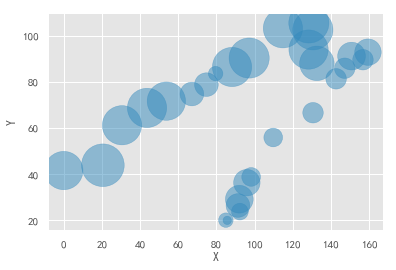

In [26]:
fig, ax = plt.subplots()
df.plot.scatter(x="X", y="Y", s=df["type_count"]*70, alpha=0.5, ax=ax)
fig.savefig("C:/Users/HuZheHui/Desktop/1.svg", transparent=False, dip=400, bbox_inches="tight", format="svg")

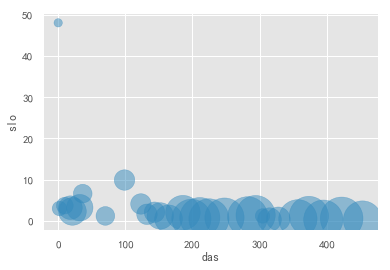

In [27]:
fig, ax = plt.subplots()
df.plot.scatter(x="das", y="slo", s=df["type_count"]*70, alpha=0.5, ax=ax)
fig.savefig("C:/Users/HuZheHui/Desktop/2.svg", transparent=False, dip=400, bbox_inches="tight", format="svg")